Forêt aléatoire avec python et scikit-learn
 Emmanuel Jakobowicz Mis à jour le : 30 janvier 2025 méthode,  python 3 Comments

Une forêt aléatoire ou random forest est une méthode d’apprentissage supervisé extrêmement utilisée par les data scientists. En effet, cette méthode combine de nombreux avantages dans le cadre d’un apprentissage supervisé. Dans cet article, je vais vous présenter l’approche et une application avec le langage python et le package de machine learning, scikit-learn.

La forêt aléatoire – forces et faiblesses
Ses forces :

Elle permet d’obtenir de bons résultats assez rapidement
Elle est basé sur des principes simples
Elle est simplement implémentable
Les calculs de l’apprentissage peuvent être facilement distribués
Ses faiblesses :

Son temps d’apprentissage peut parfois être un peu lent
Elle est souvent dépassée par d’autres méthodes plus difficiles à mettre en place mais souvent plus efficaces telles que les GBM (gradient boosting machine)
Cette méthode reste l’une des plus utilisée en machine learning.

La forêt aléatoire – principes
Comme son nom l’indique, cette méthode est basée sur la notion de forêt et que ce soit en data science ou dans la réalité, une forêt est constitué des mêmes éléments : des arbres. Avant de comprendre la notion de forêt aléatoire, il faut donc comprendre la notion d’arbre.

Les arbres de décision
L’apprentissage par arbre de décision est une approche permettant de construire des arbres qui serviront de modèle prédictif. Ainsi un arbre ressemble à cela :

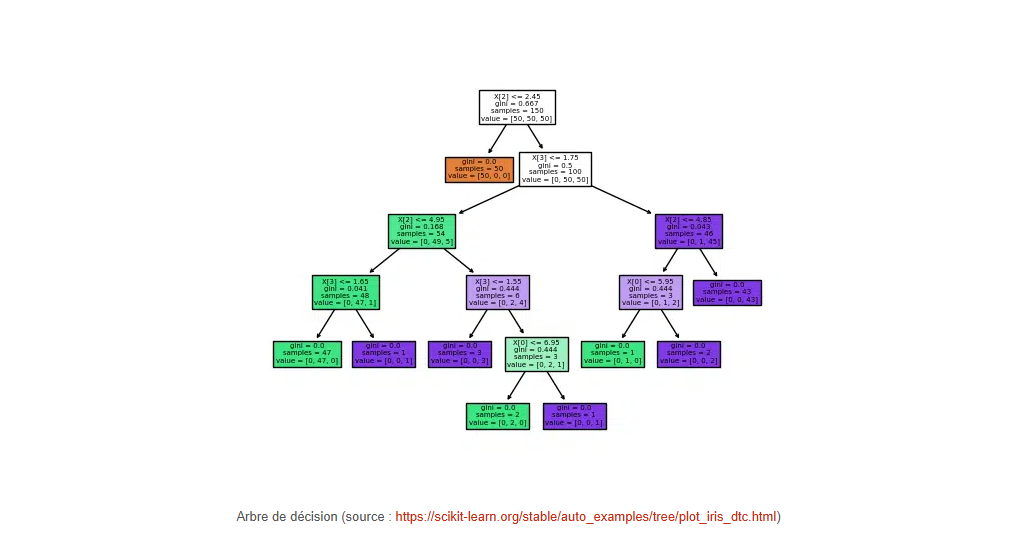

Il est composé de feuilles et de branches. On part du sommet de l’arbre et on descend en empruntant les feuilles jusqu’à arriver en bas de l’arbre ce qui va permettre de prendre une décision.

La construction de l’arbre est basée sur des algorithmes permettant d’optimiser un critère afin d’obtenir des séparations les plus « pures » possibles. L’apprentissage par arbre de décision consiste en l’apprentissage de l’arbre en utilisant vos données. Chaque branche est créée de manière à séparer le mieux possibles les différentes modalités de la cible de votre apprentissage supervisé.

Un arbre possède de nombreux avantages, notamment une interprétabilité extrêmement grande. Néanmoins, il possède une très grande faiblesse, sa stabilité. En effet, un arbre est extrêmement sensible à de petits changements dans les données d’apprentissage. Si vous changez légèrement les données, l’arbre peut en être totalement modifié. Afin de contrer cette faiblesse, les forêts aléatoires ont été créées.

La forêt
Le principe de la forêt aléatoire est simple, il s’agit de multiplier les arbres. Mais bien évidemment, si vous créez 100 arbres sur les mêmes données, vous allez obtenir 100 fois le même arbre. Nous allons donc modifier légèrement les données pour chacun des 100 arbres.

Le rééchantillonnage par bootstrap
Afin de modifier légèrement les données, nous allons utiliser une méthode bien connue des statisticiens : le bootstrap. Il s’agit d’une méthode qui permet, à partir d’un échantillon, de construire de nouveaux échantillons par tirage aléatoire avec remise. Ceci revient à faire pour le cas d’un jeu de données avec 10000 lignes et 100 colonnes :

On a un échantillon original de 10000 lignes et 100 colonnes
On tire aléatoirement avec remise 10000 lignes (ceci veut dire qu’on aura 10000 lignes dans le nouvel échantillon mais avec certaines lignes de l’échantillon original plusieurs fois et d’autres pas du tout)
On répète l’étape 2 autant de fois qu’on a besoin d’arbres dans la forêt
Le bootstrap a de nombreuses propriétés très intéressantes étudiées en détails par Efron dans ses ouvrages et ici.

L’apprentissage de la forêt
Une fois les échantillons générés, on peut construire les arbres. Pour cela, on va tirer aléatoirement certaines colonnes de nos données de façon à ne pas utiliser toutes les colonnes simultanément et apprendre sur chaque échantillon bootstrap. On aura donc 100 arbres qui seront tous légèrement différents.

Une fois l’apprentissage terminé, les règles de décisions des 100 arbres sont stockées afin d’être appliquées en mode prédictif. Ceci revient à faire passer une nouvelle observation dans les 100 arbres et chaque arbre va définir une classe d’appartenance, un vote de majorité est appliqué pour établir la classe prédite.

Mise en œuvre avec python
On va utilise python pour mettre en œuvre une forêt aléatoire. On commence par charger les packages dont on a besoin :

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

On récupère des données, nous utiliserons des données classiques d’apprentissage supervisé, il s’agit d’un modèle permettant de prédire la couleur d’un vin en fonction de ses caractéristiques physico-chimiques.

In [3]:
data = pd.read_csv("https://www.stat4decision.com/wine_data.csv", index_col = 0)
data["type"].value_counts()

type
0    4898
1    1599
Name: count, dtype: int64

On a donc 4898 vins blancs et 1599 vins rouges.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


On n’a pas de données manquantes et on a 11 variables explicatives pour notre modèle et une cible (type).

Séparation apprentissage / test
On va donc séparer nos données en un échantillon d’apprentissage pour apprendre notre modèle et un échantillon test pour tester l’efficacité de la forêt aléatoire.

In [5]:
y = data["type"]
x = data.drop("type", axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)

On utilise un échantillon de test représentant 25% des données.

Apprentissage de la forêt aléatoire
On va utiliser scikit-learn pour construire notre forêt aléatoire, on utilise donc la classe RandomForestClassifier de scikit-learn et on crée un objet à partir de cette classe. C’est à ce moment que nous allons définir ce qu’on appelle les hyperparamètres du modèle. Il s’agit de paramètres tels que le nombre d’arbres dans la forêt qui doivent être définis en amont de l’apprentissage.

In [6]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

Tous ces hyperparamètres ont des valeurs par défaut que nous modifions rarement, mais il est utile de les comprendre. En voici un description rapide :

n_estimators : il s’agit du nombre d’arbres dans la forêt

criterion : il s’agit du critère utilisé pour construire les arbres et séparer les branches des arbres

max_depth : il s’agit de la profondeur maximale des arbres utilisés (le nombre de niveaux dans l’arbre de décision)

min_sample_split : il s’agit du nombre d’échantillons minimal dans une feuille pour refaire une séparation

min_samples_leaf : il s’agit du nombre d’échantillons minimal pour créer une feuille

min_weight_fraction_leaf : il s’agit de la fraction du nombre total d’échantillon minimal pour créer une feuille

max_features : il s’agit du nombre de colonnes sélectionnées pour chaque arbre (par défaut on prend la racine carré du nombre de colonnes)

max_leaf_nodes : il s’agit du nombre maximal de feuilles

min_impurity_decrease : il s’agit de la baisse minimale du critère d’impureté pour faire une séparation

bootstrap : paramètre pour utiliser du bootstrap, si il est à False, le même échantillon est pris pour chaque arbre

n_jobs ; nombre de traitements à effectuer en parallèle

random_state : graine aléatoire

warm_start : ceci permet de repartir du résultat du dernier apprentissage pour faire l’apprentissage

class_weights : il s’agit des poids associés à chaque classe si cela a un sens

max_samples : si vous voulez réduire le nombre d’observations dans vos échantillons bootstrap

Bien entendu, vous ne toucherez à quasiment aucun de ces hyperparamètres mais ils vous permettent néanmoins d’améliorer votre modèle, le choix de ces hyperparamètres se fait au moment de l’ajustement des hyperparamètres du modèle (on utilise généralement la classe GridSearchCV pour cela).

Nous avons donc construit un objet forêt aléatoire, nous devons maintenant effectuer l’apprentissage :

In [8]:
modele_rf.fit(x_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

On peut afficher l’importance des variables de notre modèle de forêt aléatoire :

In [9]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

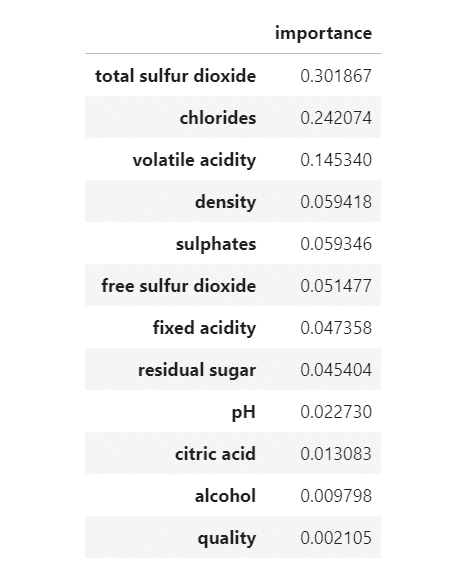

On voit que la variable la plus importante (au sens de son importance dans les arbres générés) est total sulfur dioxyde. On voit que la moins importante est la qualité qui a été évaluée par des juges.

Validation du modèle et prédictions
Une fois notre modèle appris, il faut le valider. Pour cela, on va utiliser les données de test et des indicateurs très classiques.

On compare donc la valeur prédite par le modèle avec la valeur dans les données. Il s’agit ici de comparer la couleur du vin prédite par le modèle et celle observée dans notre échantillon test.

Le premier indicateur utilisé est le pourcentage de bien classé aussi appelé accuracy :

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Cet indicateur mesure le nombre de vins bien classés (rouge ou blanc) dans notre échantillon test. On voit qu’on a ici 99,56% de vins bien classés, ce qui traduit une très bonne qualité prédictive de notre modèle.

Pour avoir une analyse plus fine des résultats, on peut utiliser la matrice de confusion. Celle-ci donne plus de détails sur les vins qui sont mal classés :

In [11]:
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["blanc_données", "rouge_données"],
             columns = ["blanc_predit", "rouge_predit"])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

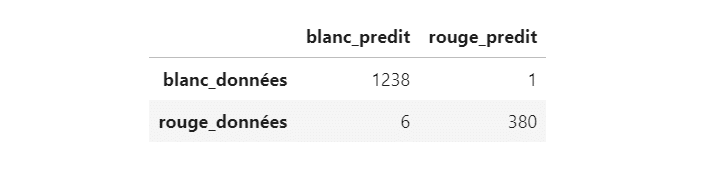

On voit ici qu’un vin blanc (blanc_données) a été considéré comme rouge par le modèle (rouge_predit) et que 6 vins rouges (rouge_données) ont été prédits comme blancs par le modèle (blanc_predit).

Le notebook de cette article est disponible sur GitHub ici.